In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import train and test CSV files
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hegarty, Miss. Hanora ""Nora""",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
print('list of features:\n {}'.format(train.columns))

list of features:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.500,NaN,S
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.275,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.500,NaN,S
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.550,NaN,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.000,F33,S


In [9]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


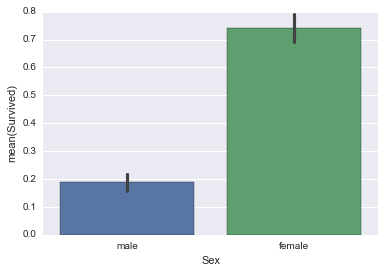

In [11]:
sns.barplot(x='Sex', y='Survived', data=train)

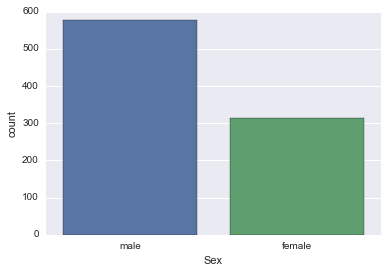

In [14]:
sns.countplot('Sex', data=train)

In [15]:
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of females who survived: 74.2038216561
Percentage of males who survived: 18.8908145581


In [24]:
tmp = train['Survived'][train['Sex'] == 'female'].value_counts(normalize=True)

In [25]:
type(tmp)

pandas.core.series.Series

In [26]:
tmp

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [28]:
tmp[1]*100

74.203821656050948

In [29]:
train.loc[['Survived', 'Sex'=='female']]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
False,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.25,NaN,S


In [33]:
print("Percentage of females who survived with normalization:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1])

Percentage of females who survived with normalization: 0.742038216561


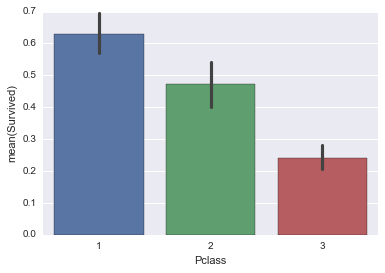

In [34]:
sns.barplot(x='Pclass', y='Survived', data=train)

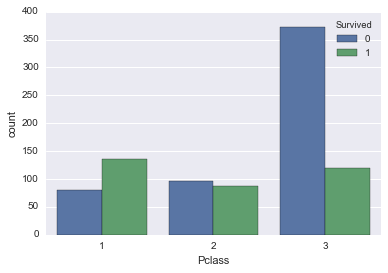

In [35]:
sns.countplot('Pclass', hue='Survived', data=train)

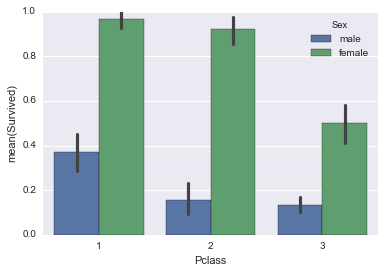

In [38]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

In [45]:
train['Survived'][train['Pclass'] == 1].value_counts(normalize=True)[1]

0.62962962962962965

In [48]:
print(train['Survived'][train['Pclass'] == 2].value_counts(normalize=True)[1])
print(train['Survived'][train['Pclass'] == 3].value_counts(normalize=True)[1])

0.472826086957
0.242362525458


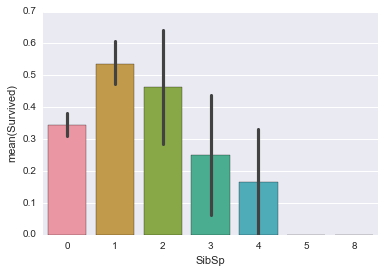

In [49]:
sns.barplot(x='SibSp', y='Survived', data=train)

In [52]:
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.5394736842
Percentage of SibSp = 1 who survived: 53.5885167464
Percentage of SibSp = 2 who survived: 46.4285714286
Percentage of SibSp = 2 who survived: 25.0
Percentage of SibSp = 2 who survived: 16.6666666667


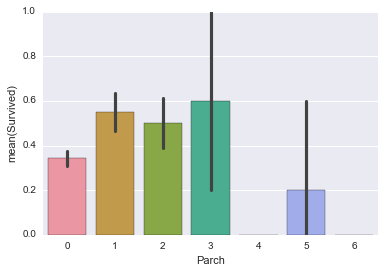

In [53]:
sns.barplot(x='Parch', y='Survived', data=train)

In [54]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

In [55]:
train['Age'].min()

-0.5

In [56]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

In [57]:
train['AgeGroup'].head()

0        Student
1          Adult
2    Young Adult
3    Young Adult
4    Young Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Adult < Baby < Child < Senior < Student < Teenager < Unknown < Young Adult]

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


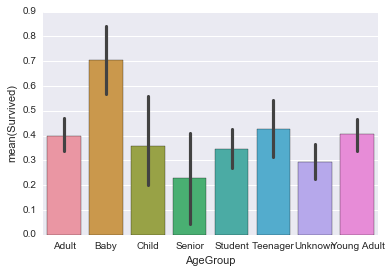

In [59]:
sns.barplot(x='AgeGroup', y='Survived', data=train)

In [60]:
train['Cabin'].isnull().sum()

687

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB


In [62]:
test['Cabin'].isnull().sum()

327

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
AgeGroup       418 non-null category
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 36.8+ KB


In [68]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0


In [71]:
print(train['Survived'][train['CabinBool'] == 1].value_counts(normalize=True)[1])
print(train['Survived'][train['CabinBool'] == 0].value_counts(normalize=True)[1])

0.666666666667
0.299854439592


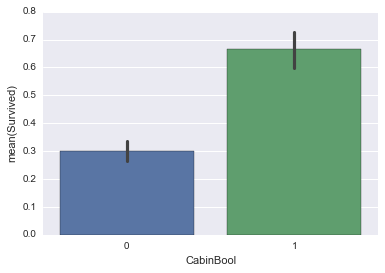

In [72]:
sns.barplot(x='CabinBool', y='Survived', data=train)

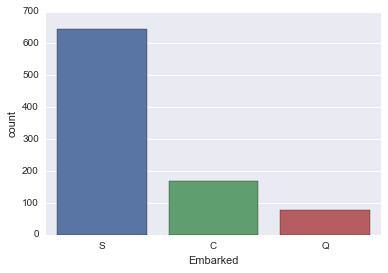

In [73]:
sns.countplot('Embarked', data=train)

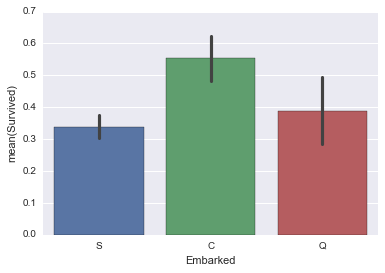

In [75]:
sns.barplot(x='Embarked', y='Survived', data=train)